#EFFECTIVE USE OF WORD ORDER FOR TEXT CATEGORIZATION WITH CONVOLUTIONAL NEURAL NETWORKS


---

**Assignment done by: Laura Escobar Crespo 



---



---



###ABSTRACT
*Convolutional neural network (CNN) is a neural network that can make use of the internal structure of data such as the 2D structure of image data. This paper studies CNN on text categorization to exploit the 1D structure (namely, word order) of text data for accurate prediction. Instead of using low-dimensional word vectors as input as is often done, we directly apply CNN to high-dimensional text data, which leads to directly learning embedding of small text regions for use in classification.*

This statement can be found in [here](https://paperswithcode.com/paper/effective-use-of-word-order-for-text-1).
This [paper](https://github.com/jean-kunz/ml_research_papers/blob/master/word_order_text_classification_cnn/word_order_text_classification_cnn.ipynb) was the base of the assignment as well as [website of CNN in NLP](https://towardsdatascience.com/convolutional-neural-network-in-natural-language-processing-96d67f91275c) and [website of CNN for text processing](https://medium.com/voice-tech-podcast/text-classification-using-cnn-9ade8155dfb9).





---



---
###CNN FOR TEXT CATEGORIZATION/CLASSIFICATION

**Import libraries**

The first step is to import all the neccesary libraries for the code development.

The dataset used is imported from [keras datasets](https://keras.io/api/datasets/), which is exactly the imdb movie review.


In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

**Loading the data and spliting into train and test**

At the same time that we load the dataset we divide into train and text set, specifying that only the top 5000 most frequent words are kept. It will return a list of sequences.

In [ ]:
# Our dictionary will contain only of the top 5000 words appearing most frequently
top_words = 5000
# Now we split our data-set into training and test data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# Looking at the nature of training data
print(X_train[0])
print(y_train[0])
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1
Shape of training data: 
(25000,)
(25000,)
Shape of test data: 
(25000,)


We can see that both datasets, train and test, consist in 25000 samples each. Every sample is a vector of text indexed within the limit of top words of 5000.

The following step is to define a maximum sequence lenght so the kernel filter and stride can work well. 


In [ ]:
# Padding the data samples to a maximum review length in words, set as 450
max_words = 450
X_train = sequence.pad_sequences(X_train, maxlen=max_words)#keras provides a function to set a limit in sequences
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

**Defining the CNN model**

The model is defined as sequential, and it starts with an embedding layer of the top words (5000) into a 32 dimensional embedding as well as specifying the maximum sequence.

The convolutional layer (1D) and the max pooling layer are the next. The resulting matrices are flatten into vectors and added dense layers.

The last dense layer is having one as parameter because we are doing a binary classification and so we need only one output node in our vector.

In [ ]:
model = Sequential()  # initilaizing the Sequential nature for CNN model
# Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 450, 32)           160000    
                                                                 
 conv1d_9 (Conv1D)           (None, 450, 32)           3104      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 225, 32)          0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 7200)              0         
                                                                 
 dense_18 (Dense)            (None, 250)               1800250   
                                                                 
 dense_19 (Dense)            (None, 1)                 251       
                                                      

**Training and testing**

Now, we will fit our training data and define the the epochs(number of passes through dataset) and batch size(nunmber of samples processed before updating the model) for our learning model.

In [ ]:
history = model.fit(X_train, y_train,
                     epochs=10,
                     verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=32)

loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=False)

loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=False)

**Results**

In the following cells it shown the results, loss and accuracy, for the training and test.



In [ ]:
print("Training Accuracy: {:.4f}".format(accuracy_train))
print("Test Accuracy: {:.4f}".format(accuracy_test))
print("Training Loss: {:.4f}".format(loss_train))
print("Test Loss: {:.4f}".format(loss_test))

Training Accuracy: 0.9975
Test Accuracy: 0.8682
Training Loss: 0.0077
Test Loss: 0.8233


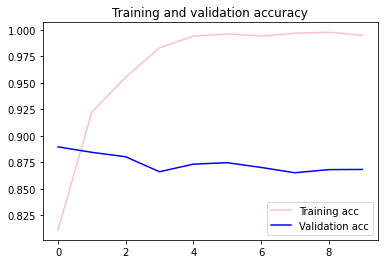

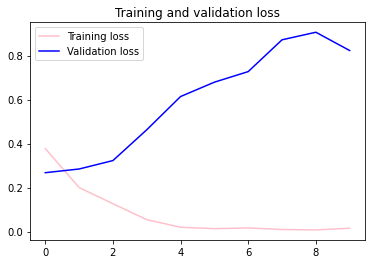

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', color="pink", label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', color="pink", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Though we observe that both the accuracy for the training and test is quite good, the loss for the test is pretty high meaning that this model in specific is overfitted.

A way to avoid this overfitting could be to add more layer to our model, training with a bigger dataset or cleanning the data in more detail.